In [31]:
import pandas as pd

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.tree import export_graphviz
from graphviz import Source

from sklearn.tree import plot_tree

In [3]:
# Import datasets
X_train = pd.read_pickle("/home/usp-ds-arnem/data/UCI_X_train.pkl")
y_train = pd.read_pickle("/home/usp-ds-arnem/data/UCI_y_train.pkl")
X_test = pd.read_pickle("/home/usp-ds-arnem/data/UCI_X_test.pkl")
y_test = pd.read_pickle("/home/usp-ds-arnem/data/UCI_y_test.pkl")

In [10]:
print(X_train.shape[0])
print(X_train.shape[1])

7352
562


In [12]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7352, 562)
(2947, 562)
(7352, 1)
(2947, 1)


In [15]:
print(X_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 562 entries, subject to 560-angleZgravityMean
dtypes: float64(561), int64(1)
memory usage: 31.5 MB
None


In [16]:
X_train.head()

,subject,000-tBodyAcc-mean-X,001-tBodyAcc-mean-Y,002-tBodyAcc-mean-Z,003-tBodyAcc-std-X,004-tBodyAcc-std-Y,005-tBodyAcc-std-Z,006-tBodyAcc-mad-X,007-tBodyAcc-mad-Y,008-tBodyAcc-mad-Z,...,551-fBodyBodyGyroJerkMag-meanFreq,552-fBodyBodyGyroJerkMag-skewness,553-fBodyBodyGyroJerkMag-kurtosis,554-angletBodyAccMeangravity,555-angletBodyAccJerkMeangravityMean,556-angletBodyGyroMeangravityMean,557-angletBodyGyroJerkMeangravityMean,558-angleXgravityMean,559-angleYgravityMean,560-angleZgravityMean
0,1,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,1,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,1,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,1,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


In [23]:
y_train.head()

,label
0,STANDING
1,STANDING
2,STANDING
3,STANDING
4,STANDING


Decision Tree model

In [58]:
dt_cl = DecisionTreeClassifier(random_state=42,
                               max_depth=10)

dt_cl.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, random_state=42)

In [59]:
# predict value
y_pred = dt_cl.predict(X_test)

In [60]:
accuracy_score(y_test, y_pred)

0.8649474041398032

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

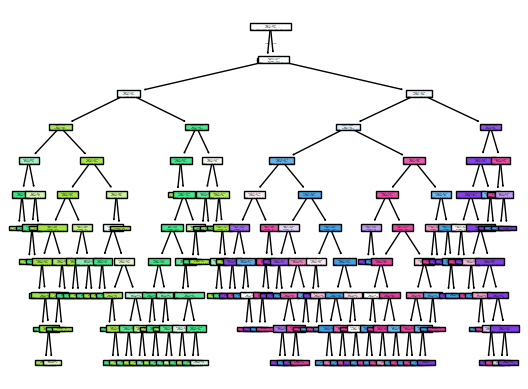

In [63]:
plt.Figure(figsize=(10,6))
plot_tree(dt_cl, filled=True)
plt.show()

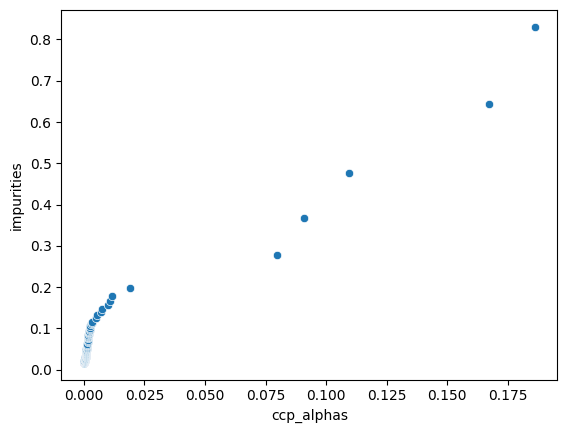

In [64]:
path = dt_cl.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

sns.scatterplot(x = ccp_alphas, y = impurities)
plt.xlabel('ccp_alphas')
plt.ylabel('impurities')
plt.show()

In [65]:
len(ccp_alphas)

97

In [69]:
dt_cl.criterion

'gini'

In [70]:
dt_cl.get_params

<bound method BaseEstimator.get_params of DecisionTreeClassifier(max_depth=10, random_state=42)>

In [79]:
dt_cl.max_features_

562

In [81]:
dt_cl.classes_

array(['LAYING', 'SITTING', 'STANDING', 'WALKING', 'WALKING_DOWNSTAIRS',
       'WALKING_UPSTAIRS'], dtype=object)

Hyperparameter Optimization

In [102]:
params = {
    'max_depth': [5, 7, 10],
    'min_samples_split': [10, 20, 30],
    'min_samples_leaf': [5, 10, 15]
}

dt = DecisionTreeClassifier(random_state=42)

grid_search = GridSearchCV(dt,
                  params,
                  n_jobs=-1,
                  cv=5,
                  scoring='accuracy'
                  )

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print(best_params)

{'max_depth': 10, 'min_samples_leaf': 15, 'min_samples_split': 10}


Best model for classification

In [103]:
dt = DecisionTreeClassifier(random_state=42,
                            max_depth=10,
                            min_samples_leaf=15,
                            min_samples_split=10)

dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
accuracy_score(y_test, y_pred)

0.8686800135731252

In [126]:
export_graphviz(
        dt,
        out_file=str("/home/usp-ds-arnem/images/hw1_tree.dot"),  # path differs in the book
        #feature_names=X_train,
        #class_names=y_train,
        rounded=True,
        filled=True
    )

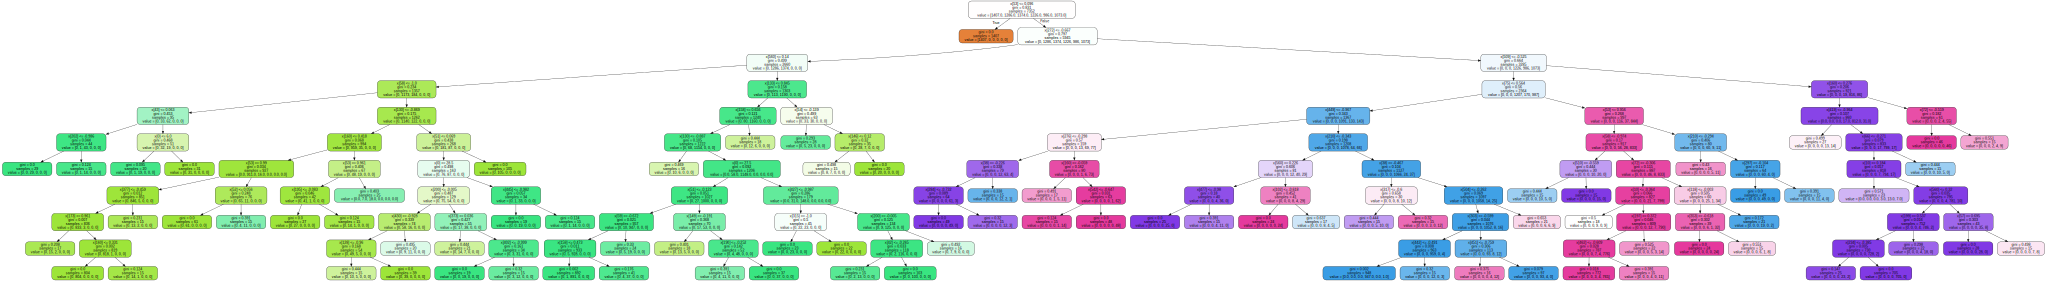

In [127]:
Source.from_file("/home/usp-ds-arnem/images/hw1_tree.dot")

In [137]:
X_train.columns[54]

'053-tGravityAcc-min-Y'

In [138]:
X_train.columns[273]

'272-fBodyAcc-mad-Y'

## Random Forest - could we get better results?

In [139]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.pipeline import Pipeline

Modelo sem nenhum ajuste

In [154]:
rf = RandomForestClassifier(random_state=42)

rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test, y_pred)

/root/.local/share/virtualenvs/usp-ds-arnem-_IUna4d0/lib/python3.11/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


0.9189005768578216

Wow! better result :)

In [141]:
from sklearn.metrics import classification_report, confusion_matrix

In [155]:
print(classification_report(y_test, y_pred))

                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.91      0.90      0.90       491
          STANDING       0.91      0.92      0.91       532
           WALKING       0.86      0.97      0.91       496
WALKING_DOWNSTAIRS       0.97      0.82      0.89       420
  WALKING_UPSTAIRS       0.88      0.89      0.88       471

          accuracy                           0.92      2947
         macro avg       0.92      0.92      0.92      2947
      weighted avg       0.92      0.92      0.92      2947



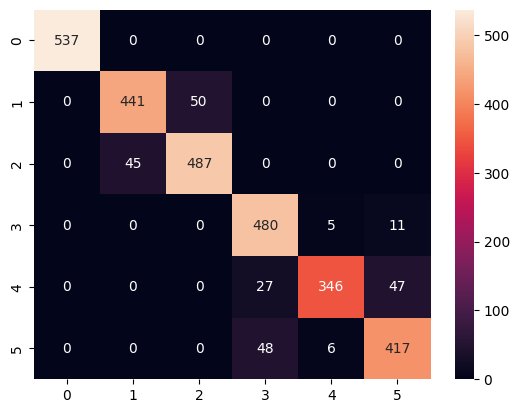

In [156]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

In [157]:
importances = rf.feature_importances_
importances

array([7.91925017e-04, 1.64560662e-04, 1.59702250e-04, 1.28121399e-04,
       9.65072364e-03, 4.82310311e-04, 2.29605629e-04, 3.61135511e-03,
       5.00931515e-04, 5.52947898e-04, 8.21568847e-03, 1.50945346e-04,
       2.52635717e-04, 5.57199629e-04, 1.97553292e-04, 1.43661312e-04,
       1.12455225e-03, 3.74758325e-03, 3.24130580e-04, 6.06341752e-04,
       7.62329083e-04, 4.76760780e-04, 3.03073522e-04, 1.33366382e-03,
       1.81688577e-04, 1.65100236e-04, 1.99291795e-04, 1.95982922e-04,
       1.61330837e-04, 3.19099977e-04, 1.94001435e-04, 1.51973831e-04,
       2.25860805e-04, 2.76307845e-04, 1.88281141e-04, 1.01603361e-04,
       1.36383150e-04, 1.83157916e-04, 4.45075706e-03, 1.32722718e-03,
       3.56990056e-03, 1.75418412e-02, 2.69916655e-02, 1.18174455e-02,
       8.79539956e-04, 2.90120335e-04, 9.30883533e-04, 1.98006328e-03,
       4.56828805e-04, 2.89371006e-04, 2.51512145e-02, 2.82596010e-02,
       1.08237871e-02, 2.67396924e-02, 3.12950878e-02, 9.96028344e-03,
      

In [158]:
rf.criterion

'gini'

In [168]:
from tqdm import tqdm
from sklearn.model_selection import ParameterGrid

In [197]:
# Pipeline setup
pipeline = Pipeline([
    ('feature_selection', SelectKBest()),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Parameters
params = {
    'classifier__n_estimators': [100, 500, 1000],
    'classifier__max_depth': [10, 20, 30],
    'classifier__min_samples_split': [5, 10],
    'classifier__min_samples_leaf': [2, 4],
    'classifier__random_state': [42]
}

# GridSearch 
grid_search = GridSearchCV(pipeline, params, 
                           cv=5, 
                           n_jobs=-1, 
                           verbose=0)

# Fit the model with progress bar
with tqdm(list(ParameterGrid(params))):
    grid_search.fit(X_train, y_train)

# Get best model
best_model = grid_search.best_estimator_

  0%|          | 0/36 [00:00<?, ?it/s]/root/.local/share/virtualenvs/usp-ds-arnem-_IUna4d0/lib/python3.11/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/root/.local/share/virtualenvs/usp-ds-arnem-_IUna4d0/lib/python3.11/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/root/.local/share/virtualenvs/usp-ds-arnem-_IUna4d0/lib/python3.11/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/root/.local/share/virtualenvs/usp-ds-arnem-_IU

In [198]:
print(best_model)

Pipeline(steps=[('feature_selection', SelectKBest()),
                ('classifier',
                 RandomForestClassifier(max_depth=20, min_samples_leaf=2,
                                        min_samples_split=5, n_estimators=500,
                                        random_state=42))])


In [199]:
y_pred = best_model.predict(X_test)

In [200]:
y_pred_proba = best_model.predict_proba(X_test)

In [201]:
print(accuracy_score(y_test, y_pred))

0.7448252460128945


In [202]:
print(classification_report(y_test, y_pred))

                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.64      0.54      0.58       491
          STANDING       0.63      0.72      0.67       532
           WALKING       0.66      0.78      0.71       496
WALKING_DOWNSTAIRS       0.83      0.62      0.71       420
  WALKING_UPSTAIRS       0.75      0.77      0.76       471

          accuracy                           0.74      2947
         macro avg       0.75      0.74      0.74      2947
      weighted avg       0.75      0.74      0.74      2947



O modelo sem ajuste nenhum obteve o melhor resultado!